In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

f = lambda x1,x2 : x1**2 + 5*x2**2 - x1*x2 + x1
x0 = np.array([-1.2, 1])
e1, e2 = 0.1, 0.15
M = 10

def draw(points, text='Метод'):
    x1_vals = np.linspace(-2, 2, 100)
    x2_vals = np.linspace(-2, 2, 100)
    x1_mesh, x2_mesh = np.meshgrid(x1_vals, x2_vals)
    f_mesh = f(x1_mesh, x2_mesh)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')    
    ax.plot_surface(x1_mesh, x2_mesh, f_mesh, cmap='viridis', alpha=0.8)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1, x2)')
    ax.set_title(f'{text}')
    temp = [[], [], []]
    for i in points:
        temp[0].append(i[0])
        temp[1].append(i[1])
        temp[2].append(f(i[0], i[1]))
    ax.plot(*temp, '-o')
    
    plt.show()
    draw2([x1_mesh, x2_mesh, f_mesh], temp)
    
def draw2(mesh, temp):
    ax1 = plt.figure().add_subplot()
    ax1.contour(*mesh, levels=20)
    ax1.plot(temp[0], temp[1], '-o')


3_0) grad(f(x0)) = [-2.4 11.2]
4_0) ||grad(f(x0))|| = 11.4543 < 0.1 ?
5_0) 0 >= 10 ?
6_0) t_0 = 0.0994180407371484
7_0) x1 = [-0.9613967  -0.11348206]
8_0) ||x1 - x0|| = 1.1388 < 0.15 ?
|f(x1) - f(x0)| = 6.5218 < 0.15 ?

3_1) grad(f(x1)) = [-0.80931135 -0.17342386]
4_1) ||grad(f(x1))|| = 0.8277 < 0.1 ?
5_1) 1 >= 10 ?
6_1) t_1 = 0.515075376884423
7_1) x2 = [-0.54454035 -0.0241557 ]
8_1) ||x2 - x1|| = 0.4263 < 0.15 ?
|f(x2) - f(x1)| = 0.1764 < 0.15 ?

3_2) grad(f(x2)) = [-0.06492501  0.30298339]
4_2) ||grad(f(x2))|| = 0.3099 < 0.1 ?
5_2) 2 >= 10 ?
6_2) t_2 = 0.09941804073714836
7_2) x3 = [-0.53808564 -0.05427771]
8_2) ||x3 - x2|| = 0.0308 < 0.15 ?
|f(x3) - f(x2)| = 0.0048 < 0.15 ?

3_3) grad(f(x3)) = [-0.02189356 -0.00469148]
4_3) ||grad(f(x3))|| = 0.0224 < 0.1 ?
k = 3
Минимум функции: -0.263025191394665
Оптимальные значения x: (-0.5380856369459159, -0.05427771146096726)


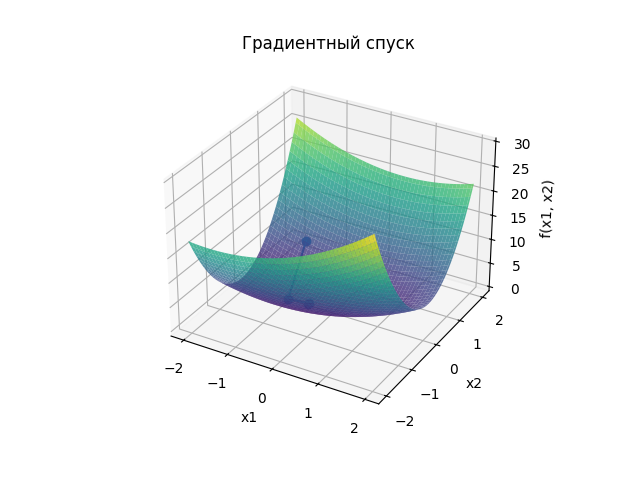

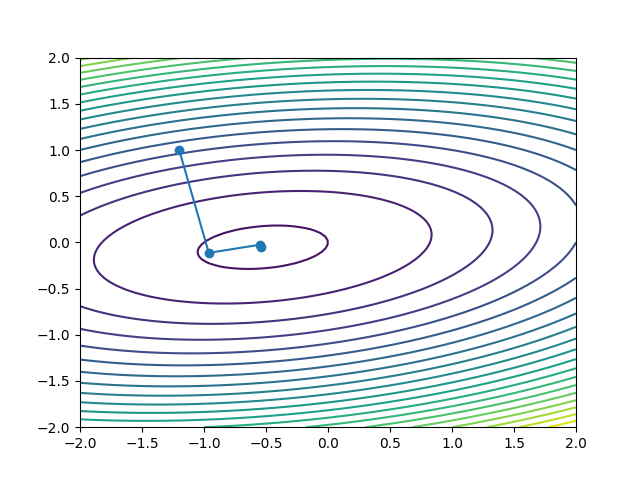

In [2]:
def t(x1, x2):
    return ((2 * x1 - x2 + 1) ** 2 + (10 * x2 - x1) ** 2) / (2 * (2 * x1 - x2 + 1) ** 2 - 2 * (2 * x1 - x2 + 1)*(10 * x2 - x1) + 10 * (10 * x2 - x1) ** 2)

def gradient_f(x1, x2):
    df_dx1 = 2*x1 - x2 + 1
    df_dx2 = 10*x2 - x1
    return np.array([df_dx1, df_dx2])

def gradient_descent(max_iter=M):
    x = x0.copy()
    history = [x.copy()]
    k = 0
    flag = False
    while True:
        print()
        gradient = gradient_f(*x)
        print(f"3_{k}) grad(f(x{k})) = {gradient}")
        print(f"4_{k}) ||grad(f(x{k}))|| = {np.linalg.norm(gradient):.4f} < {e1} ?")
        if np.linalg.norm(gradient) < e1:
            break
        print(f"5_{k}) {k} >= {max_iter} ?")
        if k >= max_iter:
            break
        x_pred = x.copy()
        print(f"6_{k}) t_{k} = {t(*x)}")
        x -= t(*x) * gradient
        history.append(x.copy())
        print(f"7_{k}) x{k+1} = {x}")
        print(f"8_{k}) ||x{k+1} - x{k}|| = {np.linalg.norm(x-x_pred):.4f} < {e2} ?")
        print(f"|f(x{k+1}) - f(x{k})| = {abs(f(*x)-f(*x_pred)):.4f} < {e2} ?")
        if np.linalg.norm(x-x_pred) < e2 and abs(f(*x)-f(*x_pred)) < e2:
            if flag:
                break
            flag = True
        else:
            flag = False
        k += 1
    return x, f(*x), k, history


(x1, x2), f_opt, k, points = gradient_descent()

print("k =", k)
print("Минимум функции:", f_opt)
print("Оптимальные значения x:", (x1, x2))
draw(points, text="Градиентный спуск")


3_0) grad(f(x0)) = [-2.4 11.2]
4_0) ||grad(f(x0))|| = 11.4543 < 0.1 ?
5_0) 0 >= 10 ?
6_0) H(x) 7_0) H(x)^(-1)
8_0) delt1 = 0.5263157894736842 > 0; delt2 = 0.05263157894736841 > 0 ? (положительная определенность)
9_0) d_0 = [ 0.67368421 -1.05263158]
t_0 = 1
10_0) x1 = x0+t0*d0 = [-0.52631579 -0.05263158]
11_0) ||x1 - x0|| = 1.2498 < 0.15 ?
|f(x1) - f(x0)| = 6.7032 < 0.15 ?

3_1) grad(f(x1)) = [0.00000000e+00 5.55111512e-16]
4_1) ||grad(f(x1))|| = 0.0000 < 0.1 ?
k = 1
Минимум функции: -0.2631578947368421
Оптимальные значения x: (-0.5263157894736842, -0.05263157894736836)


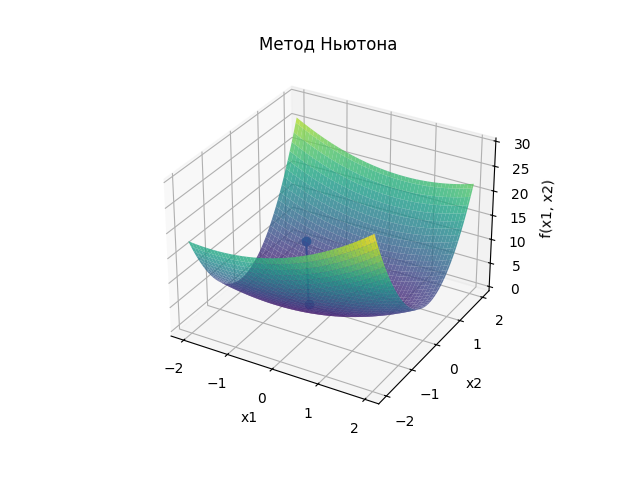

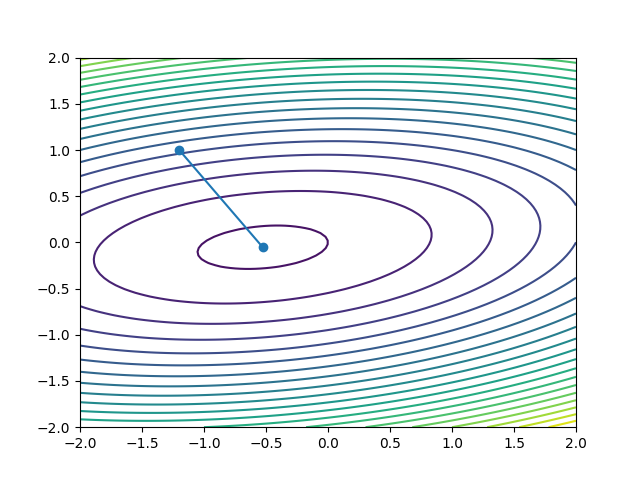

In [3]:

hessian = np.array([[2, -1], [-1, 10]])
hessian_rev = np.array([[10/19, 1/19], [1/19, 2/19]])

def newton_method(max_iter=M):
    x = x0.copy()
    history = [x.copy()]
    k = 0
    flag = False
    while True:
        print()
        gradient = gradient_f(*x)
        print(f"3_{k}) grad(f(x{k})) = {gradient}")
        print(f"4_{k}) ||grad(f(x{k}))|| = {np.linalg.norm(gradient):.4f} < {e1} ?")
        if np.linalg.norm(gradient) < e1:
            break
        print(f"5_{k}) {k} >= {max_iter} ?")
        if k >= max_iter:
            break
        print(f"6_{k}) H(x) 7_{k}) H(x)^(-1)")
        d1 = hessian_rev[0][0]
        d2 = hessian_rev[0][0]*hessian_rev[1][1] - hessian_rev[0][1]*hessian_rev[1][0]
        print(f"8_{k}) delt1 = {d1} > 0; delt2 = {d2} > 0 ? (положительная определенность)")
        if d1 > 0 and d2 > 0:
            d = - hessian_rev @ gradient_f(*x)
            print(f"9_{k}) d_{k} = {d}")
            tk = 1
        else:
            d = -gradient_f(*x)
            print(f"d_{k} = {d}")
            tk = t(*x)
        print(f"t_{k} = {tk}")
        x_pred = x.copy()
        x = x + tk*d
        history.append(x.copy())
        print(f"10_{k}) x{k+1} = x{k}+t{k}*d{k} = {x}")
        print(f"11_{k}) ||x{k+1} - x{k}|| = {np.linalg.norm(x-x_pred):.4f} < {e2} ?")
        print(f"|f(x{k+1}) - f(x{k})| = {abs(f(*x)-f(*x_pred)):.4f} < {e2} ?")
        if np.linalg.norm(x-x_pred) < e2 and abs(f(*x)-f(*x_pred)) < e2:
            if flag:
                break
            flag = True
        else:
            flag = False
        k += 1
    return x, f(*x), k, history


(x1, x2), f_opt, k, points = newton_method()

print("k =", k)
print("Минимум функции:", f_opt)
print("Оптимальные значения x:", (x1, x2))
draw(points, text="Метод Ньютона")



3_0) grad(f(x0)) = [-2.4 11.2]
4_0) ||grad(f(x0))|| = 11.4543 < 0.1 ?
5_0) 0 >= 10 ?
6_0) H(x) 7_0) H(x)^(-1)
8_0) d1 = 0.5263157894736842 > 0; d2 = 0.05263157894736841 > 0 ? (положительная определенность)
d_0 = [ 0.67368421 -1.05263158]
10_0) t_0 = 1.0
11_0) x1 = x0+t0*d0 = [-0.52631579 -0.05263158]
12_0) ||x1 - x0|| = 1.2498 < 0.15 ?
|f(x1) - f(x0)| = 6.7032 < 0.15 ?

3_1) grad(f(x1)) = [0.00000000e+00 5.55111512e-16]
4_1) ||grad(f(x1))|| = 0.0000 < 0.1 ?
k = 1
Минимум функции: -0.2631578947368421
Оптимальные значения x: (-0.5263157894736842, -0.05263157894736836)


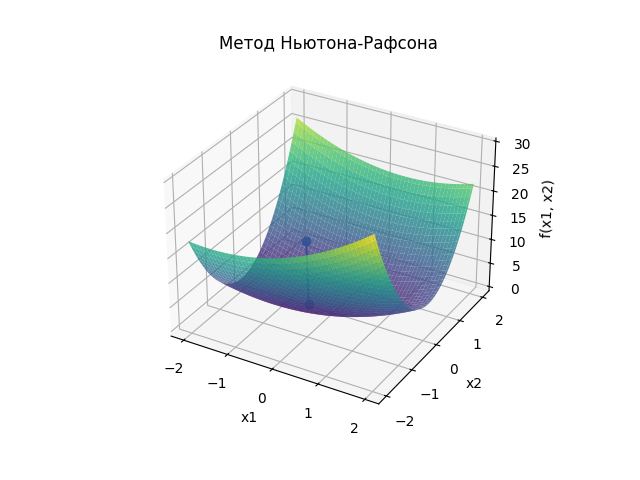

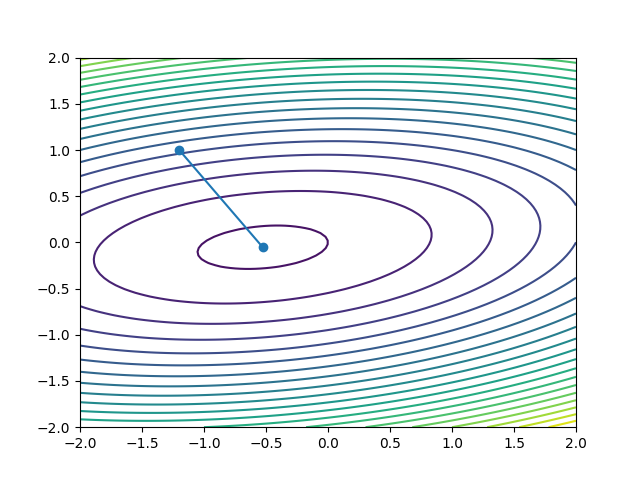

In [4]:
def t_star(x1, x2, d1, d2):
    return -(d1*(2*x1-x2+1) + d2*(10*x2-x1))/(2*d1**2 - 2*d1*d2 + 10*d2**2)

def newton_rafson_method(max_iter=M):
    x = x0.copy()
    history = [x.copy()]
    k = 0
    flag = False
    while True:
        print()
        gradient = gradient_f(*x)
        print(f"3_{k}) grad(f(x{k})) = {gradient}")
        print(f"4_{k}) ||grad(f(x{k}))|| = {np.linalg.norm(gradient):.4f} < {e1} ?")
        if np.linalg.norm(gradient) < e1:
            break
        print(f"5_{k}) {k} >= {max_iter} ?")
        if k >= max_iter:
            break
        print(f"6_{k}) H(x) 7_{k}) H(x)^(-1)")
        d1 = hessian_rev[0][0]
        d2 = hessian_rev[0][0]*hessian_rev[1][1] - hessian_rev[0][1]*hessian_rev[1][0]
        print(f"8_{k}) d1 = {d1} > 0; d2 = {d2} > 0 ? (положительная определенность)")
        if d1 > 0 and d2 > 0:
            d = - hessian_rev @ gradient_f(*x)
        else:
            d = -gradient_f(*x)
        tk = t_star(*x, *d)
        print(f"d_{k} = {d}")
        print(f"10_{k}) t_{k} = {tk}")
        x_pred = x.copy()
        x = x + tk*d
        history.append(x.copy())
        print(f"11_{k}) x{k+1} = x{k}+t{k}*d{k} = {x}")
        print(f"12_{k}) ||x{k+1} - x{k}|| = {np.linalg.norm(x-x_pred):.4f} < {e2} ?")
        print(f"|f(x{k+1}) - f(x{k})| = {abs(f(*x)-f(*x_pred)):.4f} < {e2} ?")
        if np.linalg.norm(x-x_pred) < e2 and abs(f(*x)-f(*x_pred)) < e2:
            if flag:
                break
            flag = True
        else:
            flag = False
        k += 1
    return x, f(*x), k, history


(x1, x2), f_opt, k, points = newton_rafson_method()

print("k =", k)
print("Минимум функции:", f_opt)
print("Оптимальные значения x:", (x1, x2))
draw(points, text="Метод Ньютона-Рафсона")



3_0) grad(f(x0)) = [-2.4 11.2]
4_0) ||grad(f(x0))|| = 11.4543 < 0.1 ?
5_0) 0 >= 10 ?
6_0) d_0 = [  2.4 -11.2]
9_0) t_0 = 0.0994180407371484
10_0) x1 = x0+t0*d0 = [-0.9613967  -0.11348206]
11_0) ||x1 - x0|| = 1.1388 < 0.15 ?
|f(x1) - f(x0)| = 6.5218 < 0.15 ?

3_1) grad(f(x1)) = [-0.80931135 -0.17342386]
4_1) ||grad(f(x1))|| = 0.8277 < 0.1 ?
5_1) 1 >= 10 ?
7_1) b_1 = 0.005221499189528117
8_1) d_1 = [0.80931135 0.17342386]
9_1) t_1 = 0.515075376884423
10_1) x2 = x1+t1*d1 = [-0.54454035 -0.0241557 ]
11_1) ||x2 - x1|| = 0.4263 < 0.15 ?
|f(x2) - f(x1)| = 0.1764 < 0.15 ?

3_2) grad(f(x2)) = [-0.06492501  0.30298339]
4_2) ||grad(f(x2))|| = 0.3099 < 0.1 ?
5_2) 2 >= 10 ?
7_2) b_2 = 0.14015428903309873
8_2) d_2 = [ 0.06492501 -0.30298339]
9_2) t_2 = 0.09941804073714836
10_2) x3 = x2+t2*d2 = [-0.53808564 -0.05427771]
11_2) ||x3 - x2|| = 0.0308 < 0.15 ?
|f(x3) - f(x2)| = 0.0048 < 0.15 ?

3_3) grad(f(x3)) = [-0.02189356 -0.00469148]
4_3) ||grad(f(x3))|| = 0.0224 < 0.1 ?
k = 3
Минимум функции: -0.26

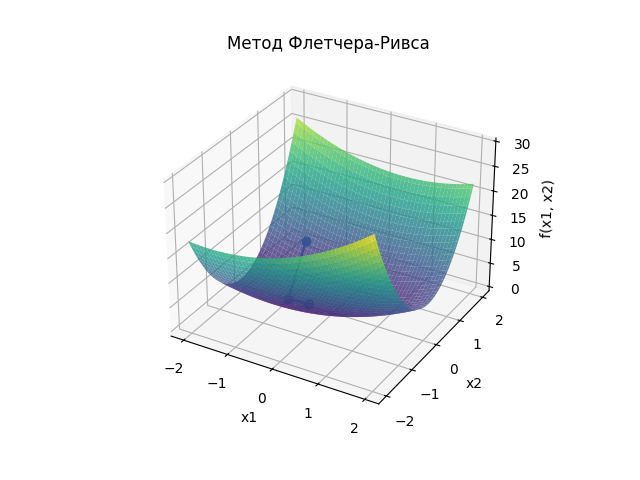

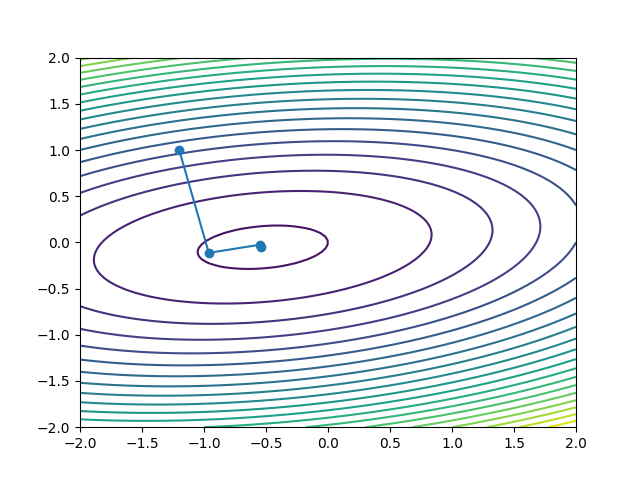

In [5]:
def fletcher_reeves_method(max_iter=M):
    x = x0.copy()
    history = [x.copy()]
    k = 0
    flag = False
    while True:
        print()
        gradient = gradient_f(*x)
        print(f"3_{k}) grad(f(x{k})) = {gradient}")
        print(f"4_{k}) ||grad(f(x{k}))|| = {np.linalg.norm(gradient):.4f} < {e1} ?")
        if np.linalg.norm(gradient) < e1:
            break
        print(f"5_{k}) {k} >= {max_iter} ?")
        if k >= max_iter:
            break
        d = 0
        if not k:
            d = -gradient_f(*x)
            print(f"6_{k}) d_{k} = {d}")
        else:
            b = (np.linalg.norm(gradient_f(*x))**2)/(np.linalg.norm(gradient_f(*x_pred))**2)
            print(f"7_{k}) b_{k} = {b}")
            d = -gradient_f(*x) + b*d
            print(f"8_{k}) d_{k} = {d}")
        
        tk = t_star(*x, *d)
        print(f"9_{k}) t_{k} = {tk}")
        x_pred = x.copy()
        x = x + tk*d
        history.append(x.copy())
        print(f"10_{k}) x{k+1} = x{k}+t{k}*d{k} = {x}")
        print(f"11_{k}) ||x{k+1} - x{k}|| = {np.linalg.norm(x-x_pred):.4f} < {e2} ?")
        print(f"|f(x{k+1}) - f(x{k})| = {abs(f(*x)-f(*x_pred)):.4f} < {e2} ?")
        if np.linalg.norm(x-x_pred) < e2 and abs(f(*x)-f(*x_pred)) < e2:
            if flag:
                break
            flag = True
        else:
            flag = False
        k += 1
    return x, f(*x), k, history


(x1, x2), f_opt, k, points = fletcher_reeves_method()

print("k =", k)
print("Минимум функции:", f_opt)
print("Оптимальные значения x:", (x1, x2))
draw(points, text="Метод Флетчера-Ривса")
